In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#loading the file with only defined consortia cases
df = pd.read_csv("defined_articles.csv")

In [12]:
plt.style.use('seaborn-v0_8-pastel')

In [6]:
substrate_map = {
    'Light': 'Light', 
    'Xylose': 'Sugars', 
    'Tryptophan': 'Amino acid medium', 
    'Cellulose': 'Lignocellulose', 
    'Lignocellulose': 'Lignocellulose', 
    'CO2': 'Gas', 
    'Syngas': 'Gas', 
    'Saccharides': 'Sugars', 
    'VFA_s': 'Short-chain fatty acids', 
    'Wastewater sludge': 'Waste', 
    'CO': 'Gas', 
    'Glucose': 'Sugars', 
    'Meat extract': 'Waste', 
    'Industrial waste': 'Waste', 
    'Amino acid medium': 'Amino acid medium', 
    'Food waste': 'Waste', 
    'Glycerol': 'Alcohols', 
    'Phenanthrene': 'Other substrate', 
    'Methanol_s': 'Alcohols', 
    'Starch': 'Sugars', 
    'Sucrose': 'Sugars',
    'Organic waste': 'Waste', 
    'Ethanol': 'Alcohols', 
    'Acetate': 'Short-chain fatty acids', 
    'Crude oil': 'Crude oil', 
    'Arabinose': 'Sugars', 
    'Antibiotic fermentation residue': 'Waste', 
    'Activated sludge': 'Waste', 
    'Galactose': 'Sugars', 
    'Bovine milk': 'Complex media', 
    'Amino acids': 'Amino acid medium', 
    'Glycerin': 'Alcohols', 
    'Sludge compost': 'Waste', 
    'Fructose': 'Sugars', 
    'Lupin flour': 'Complex media', 
    'Manure compost': 'Waste'
}

product_map = {
    'Antilisterial compounds': 'Antibiotics', 
    '7-methylxanthine': 'Pharmaceuticals', 
    'L-lysine': 'Amino acids', 
    'Fructo-oligosaccharide': 'Polysaccharides', 
    'Caproate': 'Carboxylic acids and esters', 
    'Glycosides': 'Other', 
    'coniferyl alcohol': 'Phenols', 
    'O-methylated phenylpropanoids': 'Pharmaceuticals', 
    'MCFA': 'Carboxylic acids and esters', 
    'Hydrogen': 'Hydorgen gas', 
    'caffeyl alcohol': 'Phenols', 
    '3-hydroxypropionic acid': 'Carboxylic acids and esters', 
    'Polysaccharide': 'Polysaccharides', 
    'Polyhydroxyalkanoate': 'Polyester polymers', 
    'Bacterial cellulose': 'Cellulose', 
    'Indigo': 'Dyes and pigments', 
    'Anthocyanins': 'Dyes and pigments', 
    'SCFA': 'Carboxylic acids and esters', 
    '3-hydroxybenzoic acid': 'Phenols', 
    'lovastatin': 'Pharmaceuticals', 
    'Antibodies': 'Proteins', 
    'Rosmarinic acid': 'Phenols', 
    'Butanol': 'Primary alcohols', 
    'Fumaric acid': 'Carboxylic acids and esters', 
    'Microbial proteases': 'Proteins', 
    'Recombinant protein': 'Proteins', 
    'Glucose_p': 'Metabolites to support growth', 
    'VFA': 'Carboxylic acids and esters', 
    'Ethanol': 'Primary alcohols', 
    'Pyranoanthocyanins': 'Phenols', 
    'Itaconic acid': 'Carboxylic acids and esters', 
    'P-coumaric acid': 'Carboxylic acids and esters', 
    'Methanol_p': 'Primary alcohols', 
    'Electricity': 'Electricity', 
    'Lipopeptides': 'Proteins', 
    'Phenol': 'Phenols', 
    'Biosurfactants': 'Other', 
    'Resveratrol': 'Phenols', 
    'Biomass': 'Biomass', 
    'Cercosporin': 'Pharmaceuticals', 
    'Pharmaceutically active compounds': 'Pharmaceuticals', 
    'Caffeic acid': 'Phenols', 
    'Vitamins': 'Metabolites to support growth', 
    'Butyrate': 'Carboxylic acids and esters', 
    'Flavonoids': 'Phenols', 
    'Monacolin': 'Pharmaceuticals', 
    'Glionitrin B': 'Pharmaceuticals', 
    'Hyaluronic acid': 'Pharmaceuticals', 
    '1,3-Propanediol': 'Glycols', 
    'Propionate': 'Carboxylic acids and esters', 
    'PHB': 'Polyester polymers', 
    'Butyl acetate': 'Carboxylic acids and esters', 
    'Fatty acid': 'Carboxylic acids and esters',
    'Lactate': 'Carboxylic acids and esters', 
    'Caproic acid': 'Carboxylic acids and esters', 
    'Organic acids': 'Carboxylic acids and esters', 
    'Siderophores': 'Bacterial extracellular compounds', 
    'Bioflocculant': 'Bacterial extracellular compounds', 
    'Fermented food product': 'Fermented food products', 
    'Lactic acid': 'Carboxylic acids and esters',  
    'Glutamic acid': 'Amino acids', 
    'SCCA': 'Carboxylic acids and esters', 
    'Methane': 'Methane', 
    'SCOA': 'Carboxylic acids and esters'}

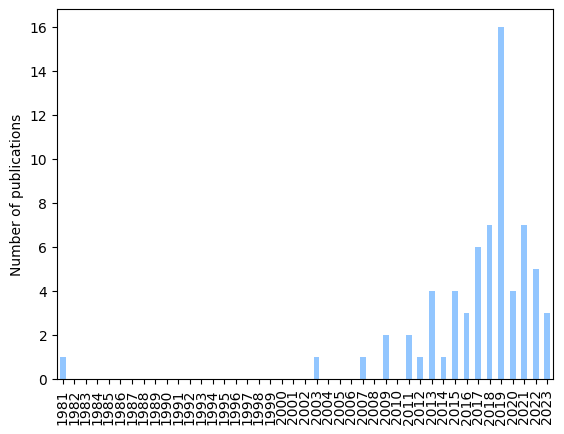

In [7]:
#Bar graph showing publications per year

#add in the years without any publications
publications_per_year = df.groupby("Year").size()
all_years = pd.Series(0, index=range(1981,2023))
publications_per_year = publications_per_year.add(all_years, fill_value=0)

#make plot
publications_per_year.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

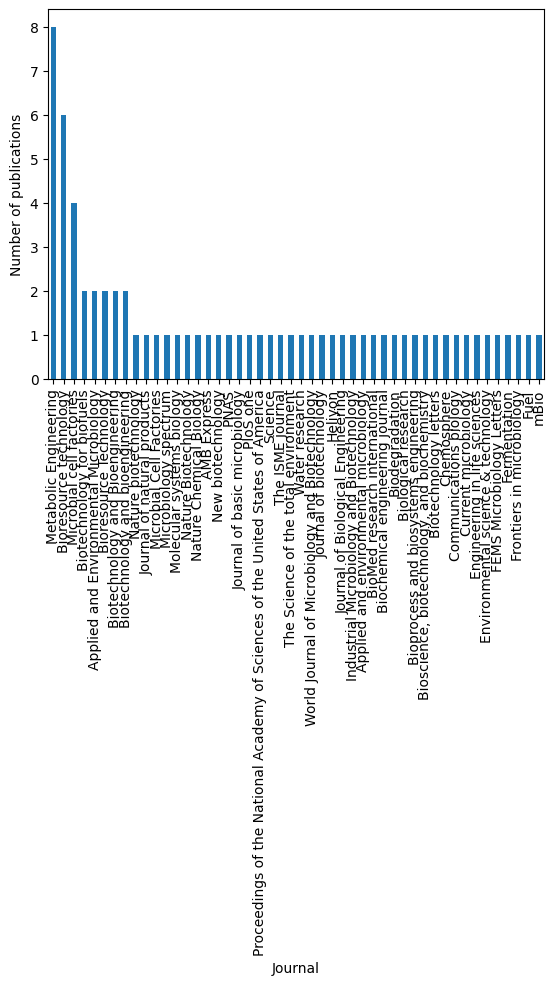

In [3]:
#Plot showing publications by journal
publications_per_journal = df.groupby("Journal").size()

#sort by decending order
publications_per_journal = publications_per_journal.sort_values(ascending=False)

#make the plot
publications_per_journal.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

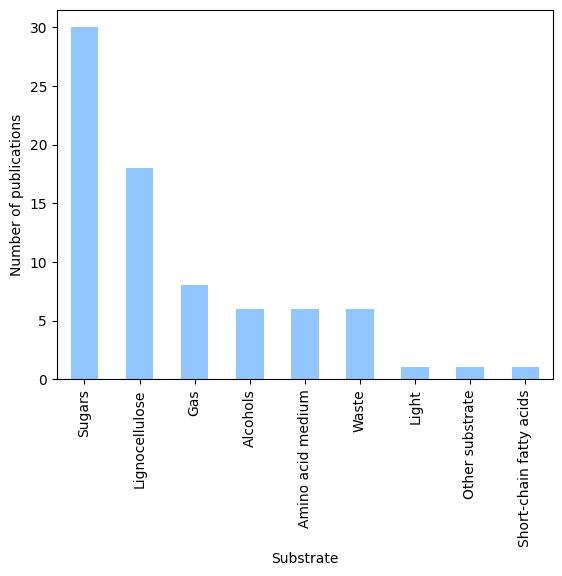

In [10]:
#Plot showing substrate

s_df = df.copy()

s_df["Substrate"] = s_df["Substrate"].str.split(", ")

# Use the explode function to create a new row for each substrate
s_df = s_df.explode("Substrate")

#use the substrate map to get more generalised results
s_df["Substrate"] = [substrate_map[s] for s in s_df["Substrate"]]

#if having used the substrate map -> remove the duplicates for same papers
for index, row in s_df.iterrows():
    all_substrates = row["Substrate"]
    unique_substrates = set(all_substrates)
    row["Substrate"] = list(unique_substrates)

#group
substrate_per_journal = s_df.groupby("Substrate").size()

#sort by decending order
substrate_per_journal = substrate_per_journal.sort_values(ascending=False)

#make the plot
substrate_per_journal.plot.bar()
#plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

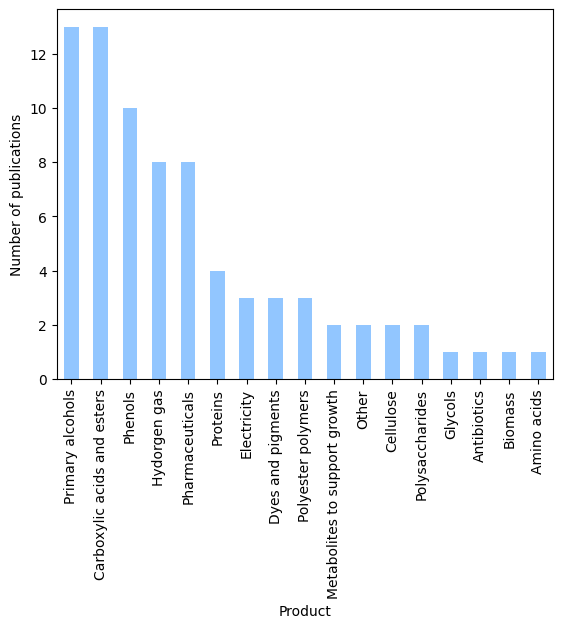

In [11]:
#Plot showing product

p_df = df.copy()

p_df["Product"] = p_df["Product"].str.split(", ")

# Use the explode function to create a new row for each animal
p_df = p_df.explode("Product")

#use the product map to get more generalised results
p_df["Product"] = [product_map[p] for p in p_df["Product"]]

#if having used the product map -> remove the duplicates for same papers
for index, row in p_df.iterrows():
    all_products = row["Product"]
    unique_products = set(all_products)
    row["Product"] = list(unique_products)

#group
product_per_journal = p_df.groupby("Product").size()

#sort by decending order
product_per_journal = product_per_journal.sort_values(ascending=False)

#make the plot
product_per_journal.plot.bar()
plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

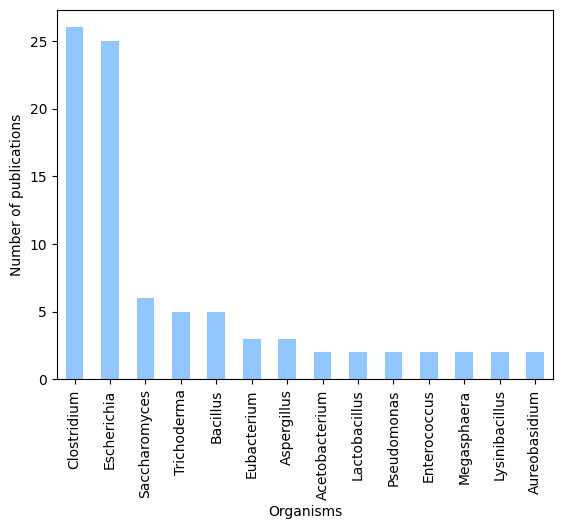

In [17]:
#Plot showing most common organisms at genus level

g_df = df.copy()

g_df["Organisms"] = g_df["Organisms"].str.split(", ")

#remove the duplicates for papers that use co-cultrues with the same genuses
for index, row in g_df.iterrows():
    all_genuses = row["Organisms"]
    unique_genuses = set(all_genuses)
    row["Organisms"] = list(unique_genuses)

# Use the explode function to create a new row for each animal
g_df = g_df.explode("Organisms")

#get only the genus
g_df['Organisms'] = g_df['Organisms'].str.split().str[0]

#group
genus_per_journal = g_df.groupby("Organisms").size()

#sort by decending order
genus_per_journal = genus_per_journal.sort_values(ascending=False)

#make the plot
genus_per_journal[:14].plot.bar()
#plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

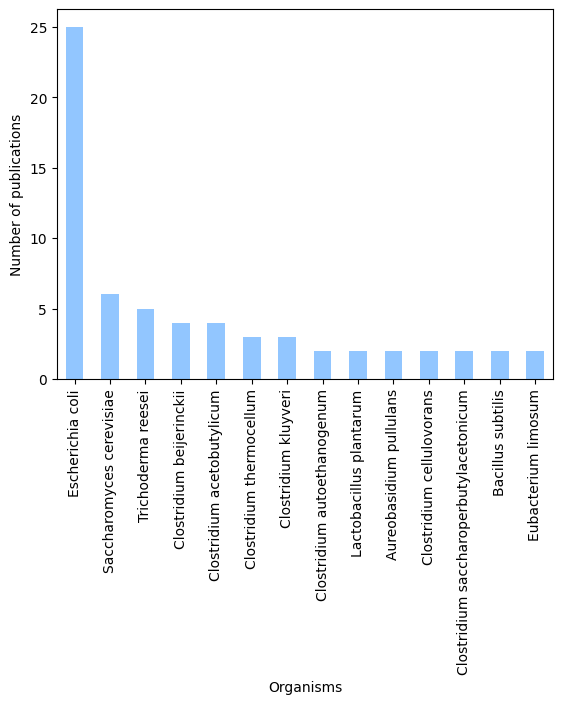

In [14]:
#Plot showing most common organisms

o_df = df.copy()

o_df["Organisms"] = o_df["Organisms"].str.split(", ")

# Use the explode function to create a new row for each animal
o_df = o_df.explode("Organisms")

#group
organism_per_journal = o_df.groupby("Organisms").size()

#sort by decending order
organism_per_journal = organism_per_journal.sort_values(ascending=False)

#make the plot
organism_per_journal[:14].plot.bar()
#plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

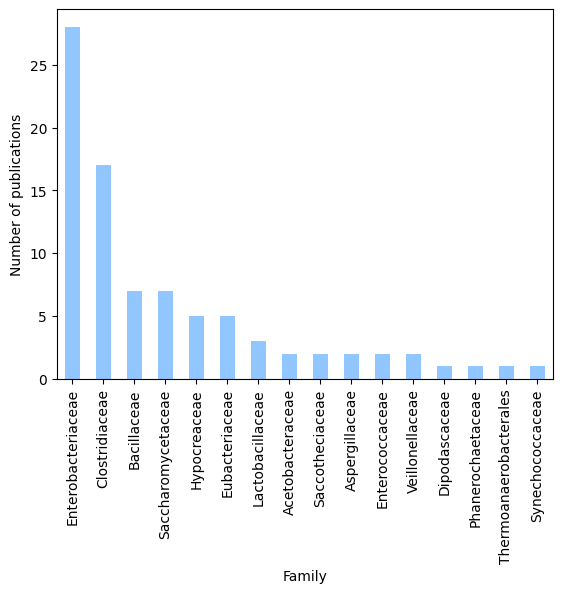

In [15]:
#Plot showing most common organisms

f_df = df.copy()

f_df["Family"] = f_df["Family"].str.split(", ")

# Use the explode function to create a new row for each animal
f_df = f_df.explode("Family")

#group
family_per_journal = f_df.groupby("Family").size()

#sort by decending order
family_per_journal = family_per_journal.sort_values(ascending=False)

#make the plot
family_per_journal[:16].plot.bar()
#family_per_journal.plot.bar()
#plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()